<a href="https://colab.research.google.com/github/NikhilAnandNair/predictive-maintenance-AI/blob/main/predictive_maintenance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving ai4i2020.csv to ai4i2020.csv
ai4i2020.csv  sample_data
   UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Machine failure  TWF  \
0                    1551         42.8                0                0    0   
1                    1408         46.3                3                0    0   
2                    1498         49.4                5                0    0   
3                    1433         39.5                7                0    0   
4                    1408         40.0                9                0    0   

   HDF  PWF  OSF  

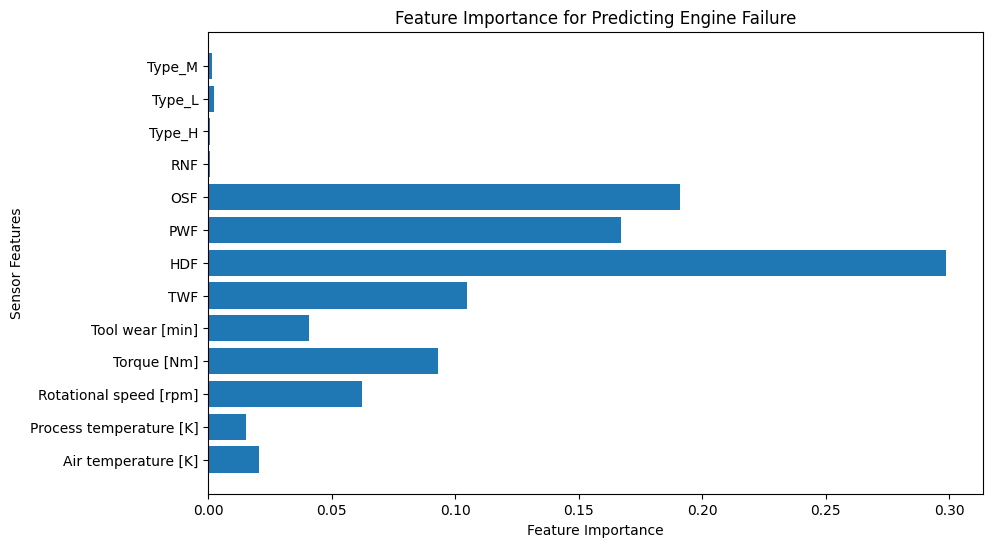

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1939
           1       1.00      0.97      0.98        61

    accuracy                           1.00      2000
   macro avg       1.00      0.98      0.99      2000
weighted avg       1.00      1.00      1.00      2000

[[1939    0]
 [   2   59]]


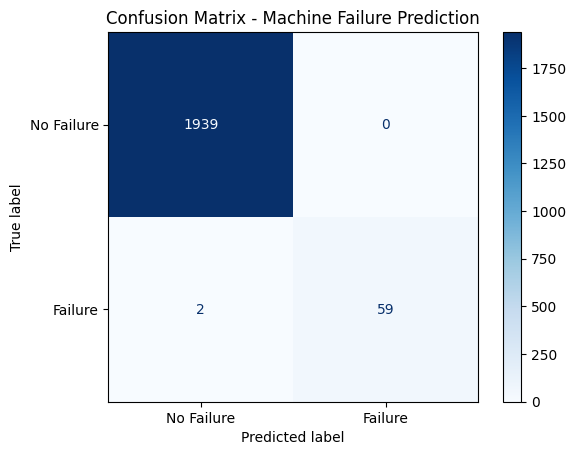

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

from google.colab import files
uploaded = files.upload()

!ls

# Load data
data = pd.read_csv('ai4i2020.csv')
print(data.head())

# Basic exploration
print(data.info())
print(data.describe())

# Preprocess
data = data.drop(['UDI', 'Product ID'], axis=1)
data = pd.get_dummies(data, columns=['Type'])  # encode categorical

# Split data
X = data.drop('Machine failure', axis=1)
y = data['Machine failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# --- Visualization ---
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Feature Importance")
plt.ylabel("Sensor Features")
plt.title("Feature Importance for Predicting Engine Failure")
plt.show()

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
# Print numeric results
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# --- Visualization ---
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Failure', 'Failure'])

# Plot
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix - Machine Failure Prediction")
plt.show()

